In [8]:
import geopandas as gpd

path = "..\\Data\\tl_2021_us_county\\tl_2021_us_county.shp"
county_df = gpd.read_file(path).to_crs("EPSG:4326")

county_df = county_df.loc[county_df['NAME']== 'San Diego',]

county_df

from shapely import Polygon, Point

san_deigo_polygon = county_df.loc[539,'geometry']
san_deigo_polygon.contains(Point(0,0))


import rioxarray
#path = "..\\Data\\population_usa28_-120_2019-07-01.tif"
path = "..\\Data\\GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R6_C8.tif"
path2 = "..\\Data\\GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C8.tif"

tif = rioxarray.open_rasterio(path)
tif2 = rioxarray.open_rasterio(path2)


In [9]:
from rioxarray.merge import merge_arrays
tif = merge_arrays([tif,tif2])
tif

<xarray.DataArray (band: 1, y: 20000, x: 10000)> Size: 2GB
array([[[-200., -200., -200., ...,    0.,    0.,    0.],
        [-200., -200., -200., ...,    0.,    0.,    0.],
        [-200., -200., -200., ...,    0.,    0.,    0.],
        ...,
        [-200., -200., -200., ...,    0.,    0.,    0.],
        [-200., -200., -200., ...,    0.,    0.,    0.],
        [-200., -200., -200., ...,    0.,    0.,    0.]]])
Coordinates:
  * x            (x) float64 80kB -1.104e+07 -1.104e+07 ... -1.004e+07
  * y            (y) float64 160kB 5e+06 5e+06 5e+06 5e+06 ... 3e+06 3e+06 3e+06
  * band         (band) int32 4B 1
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

In [10]:
tif = tif.rio.reproject("EPSG:4326")

In [11]:
import matplotlib.pyplot as plt

path = "..\\Data\\tl_2021_06_tract\\tl_2021_06_tract.shp"
tract_df = gpd.read_file(path).to_crs("EPSG:4326")
tract_df = tract_df.loc[tract_df['COUNTYFP']== '073',]

clipped_raster = tif.rio.clip([san_deigo_polygon])

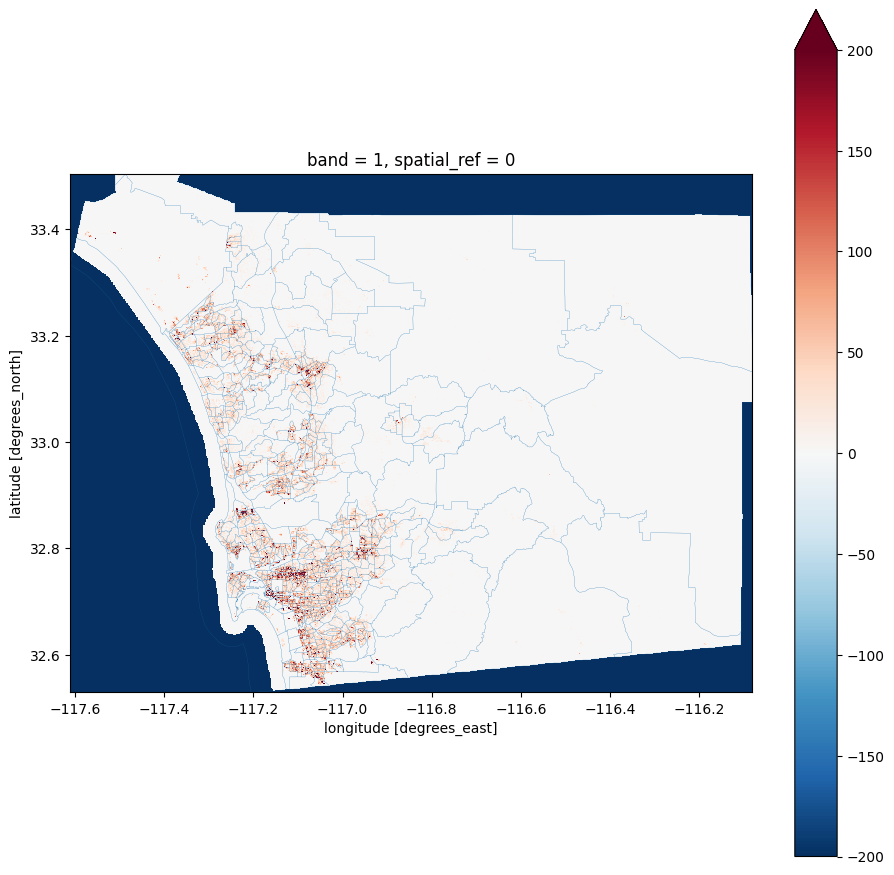

In [12]:
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(11,11))
tract_df.boundary.plot(ax=ax,linewidth=0.1)
clipped_raster.plot(ax=ax,robust=True)

In [32]:
afterdrop = clipped_raster[0]
afterdrop = afterdrop.where(clipped_raster!=-200).to_dataframe('afterdrop')
afterdrop = afterdrop.dropna()
afterdrop['afterdrop'].sum()

1684691.1868807587

In [31]:
clipped_raster.where(clipped_raster>0).sum()
#clipped_raster.sum()

<xarray.DataArray ()> Size: 8B
array(1684691.18688076)
Coordinates:
    spatial_ref  int32 4B 0

In [8]:
for index,row in afterdrop.iterrows():
    print(row)
    print(index)
    print(index[0])
    #print(index)
    break

band             1.0
spatial_ref      0.0
afterdrop     -200.0
Name: (33.50418166458132, -117.61080660553154), dtype: float64
(33.50418166458132, -117.61080660553154)
33.50418166458132


In [33]:
afterdrop['geometry'] = [Point(index[1],index[0]) for index,row in afterdrop.iterrows()]

san_deigo_pop_density = gpd.GeoDataFrame(afterdrop,geometry=afterdrop['geometry'])

In [39]:
print(san_deigo_pop_density.loc[san_deigo_pop_density['afterdrop']!=0,'afterdrop'].min())
print(san_deigo_pop_density['afterdrop'].max())

8.805392099020537e-06
1459.3818359375


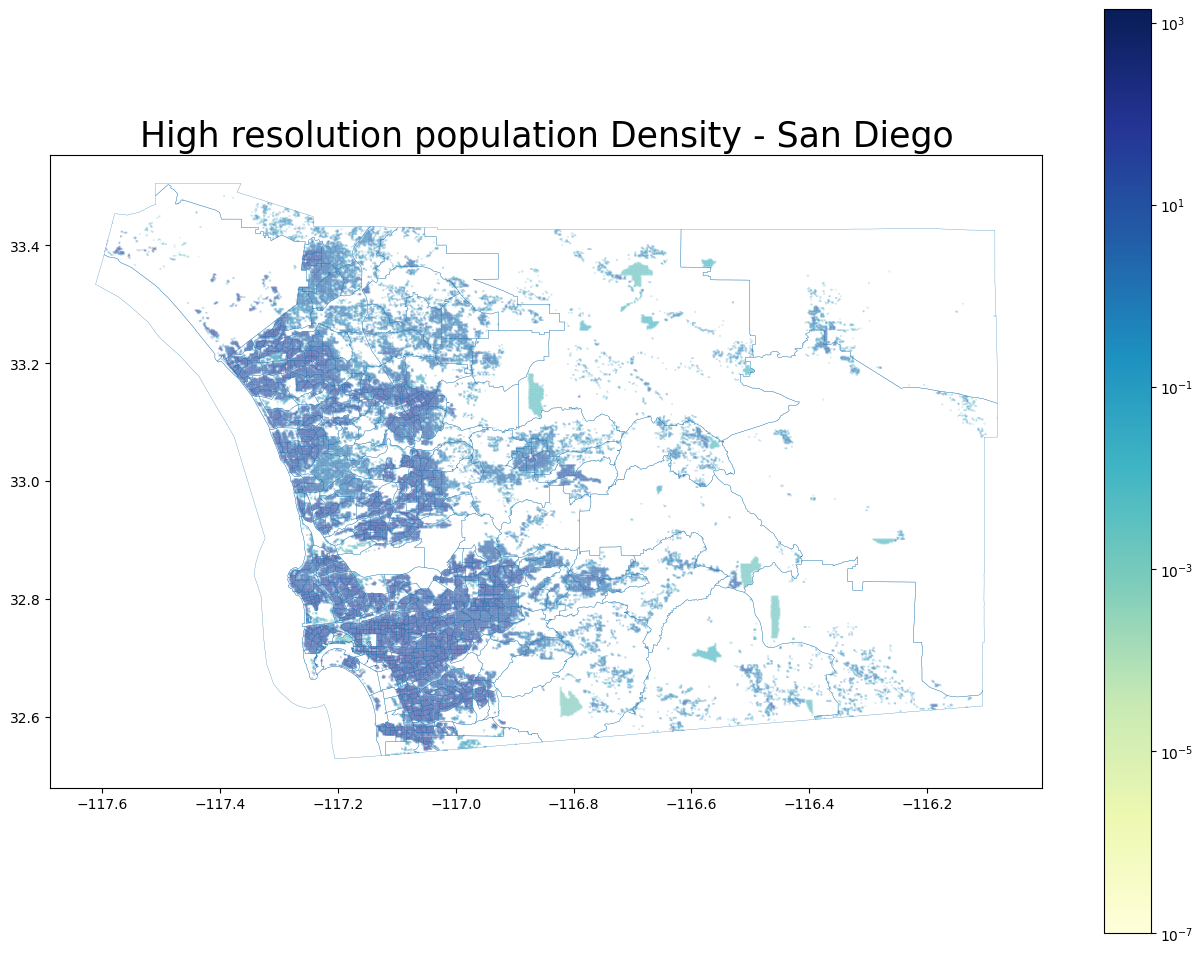

In [40]:
import matplotlib.colors as colors

fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(16,12))
tract_df.boundary.plot(ax=ax,linewidth=0.2)
san_deigo_pop_density.plot(column='afterdrop',
                           ax=ax,
                           markersize=0.01,
                           cmap='YlGnBu',
                           legend=True,
                           norm=colors.LogNorm(1e-07,1400)
                           )
plt.title("High resolution population Density - San Diego",
          fontsize=25)

plt.savefig('HiRes_Pop_Density.png')

In [43]:
afterdrop['afterdrop'].sum()

1684691.1868807587

In [ ]:
()